# **PREDICTION CAR PRICE**
# **- Steven Mavish**


#Import Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


#Exploring Data

In [ ]:
df = pd.read_csv("CarPrice_Assignment.csv",encoding='latin-1')

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.shape

(205, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#Data Cleaning

In [ ]:
dfi=df.drop(columns=['car_ID','symboling','CarName',
                     'fueltype','aspiration','doornumber',
                     'carbody','drivewheel','enginelocation',
                     'curbweight','enginetype','cylindernumber',
                     'carheight','fuelsystem','boreratio','stroke',
                     'compressionratio','peakrpm','citympg',
                     'highwaympg'])


In [ ]:
dfi.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

In [ ]:
dfi.isnull().sum()

wheelbase     0
carlength     0
carwidth      0
enginesize    0
horsepower    0
price         0
dtype: int64

#Exploratory Data Analysis and Visualization

In [ ]:
dfi.describe()

,wheelbase,carlength,carwidth,enginesize,horsepower,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,126.907317,104.117073,13276.710571
std,6.021776,12.337289,2.145204,41.642693,39.544167,7988.852332
min,86.600000,141.100000,60.300000,61.000000,48.000000,5118.000000
25%,94.500000,166.300000,64.100000,97.000000,70.000000,7788.000000
50%,97.000000,173.200000,65.500000,120.000000,95.000000,10295.000000
75%,102.400000,183.100000,66.900000,141.000000,116.000000,16503.000000
max,120.900000,208.100000,72.300000,326.000000,288.000000,45400.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


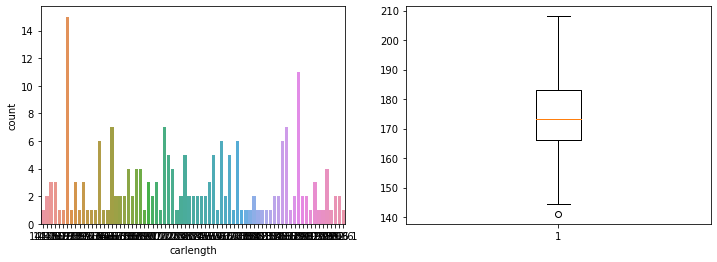

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(df['carlength'])
f.add_subplot(1,2,2)
plt.boxplot(df['carlength'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


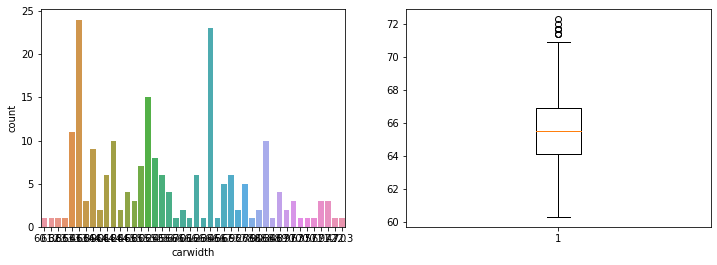

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(df['carwidth'])
f.add_subplot(1,2,2)
plt.boxplot(df['carwidth'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


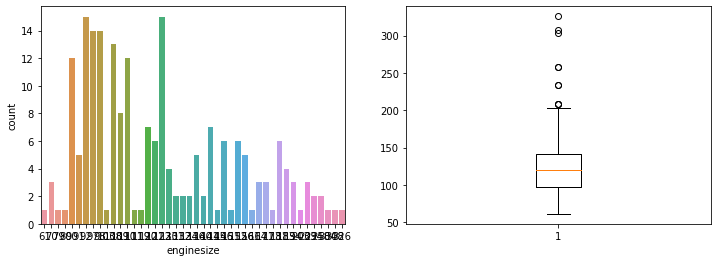

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(df['enginesize'])
f.add_subplot(1,2,2)
plt.boxplot(df['enginesize'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


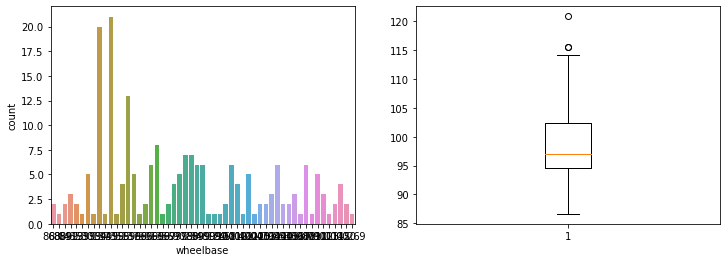

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(df['wheelbase'])
f.add_subplot(1,2,2)
plt.boxplot(df['wheelbase'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


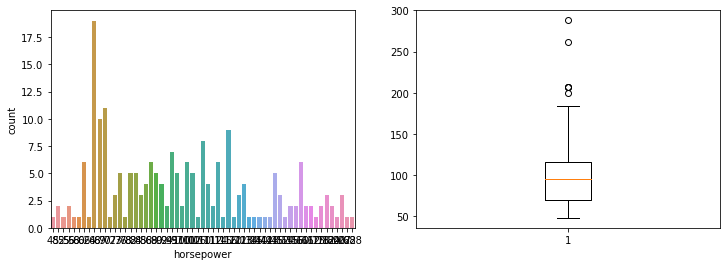

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(df['horsepower'])
f.add_subplot(1,2,2)
plt.boxplot(df['horsepower'])
plt.show()

In [ ]:
dfi.corr().style.background_gradient().set_precision(2)

,wheelbase,carlength,carwidth,enginesize,horsepower,price
wheelbase,1.00,0.87,0.80,0.57,0.35,0.58
carlength,0.87,1.00,0.84,0.68,0.55,0.68
carwidth,0.80,0.84,1.00,0.74,0.64,0.76
enginesize,0.57,0.68,0.74,1.00,0.81,0.87
horsepower,0.35,0.55,0.64,0.81,1.00,0.81
price,0.58,0.68,0.76,0.87,0.81,1.00


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

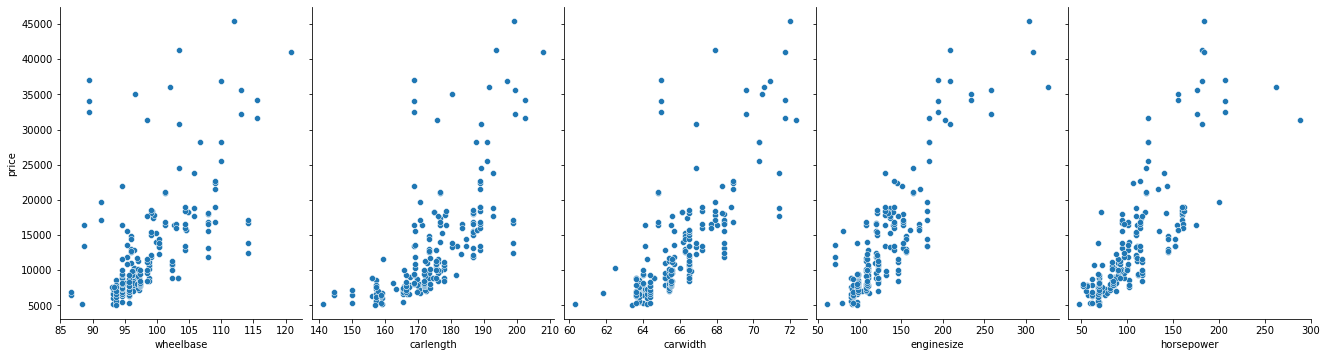

In [ ]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['wheelbase','carlength','carwidth','enginesize','horsepower'], y_vars=['price'], size=5, aspect=0.75)

#Data Modeling

In [ ]:
x = dfi.drop(columns=['price'])
y = dfi['price']
#split data menjadi training and testing dengan porsi 80:20.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
#membuat object linear regresi.
lin_reg = LinearRegression()
#train the model menggunakan training data yang sudah displit.
lin_reg.fit(x_train, y_train)
#cari tau nilai slope/koefisien (m) dan intercept (b).
print(lin_reg.coef_)
print(lin_reg.intercept_)

[ 93.18017208  -9.0227528  645.71384507  91.43778429  65.38403835]
-55282.06816196046


In [ ]:
lin_reg.score(x_test, y_test)   #R2 score

0.7710214696665062

In [ ]:
lin_reg.predict([[275, 447.5, 175, 1500, 106]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([223392.10467389])